In [59]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# we use library to ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [60]:
# in this we read data from csv file and store it in data variable
data=pd.read_csv("Iris.csv")

In [61]:
# to see the columns in data

data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
# to see the columns in data
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [63]:
# to see the shape of data
data.shape

(150, 6)

In [64]:
# we check for null values in data
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [65]:
# we should know about data types of columns in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [66]:
# we drop the Id and Species column from data and store it in x variable
x=data.drop(["Id","Species","SepalWidthCm","SepalLengthCm"],axis=1)
x.head(5)

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [67]:
x.describe()

,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


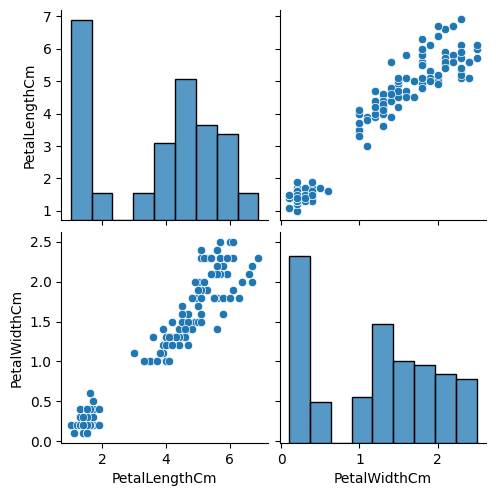

In [68]:
# we use graph to see the distribution of data
sns.pairplot(x)
plt.show()

In [69]:
# we use standard scaler to scale the data
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[-1.34127240e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.31297673e+00]
 [-1.39813811e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.31297673e+00]
 [-1.17067529e+00 -1.05003079e+00]
 [-1.34127240e+00 -1.18150376e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.44444970e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.22754100e+00 -1.31297673e+00]
 [-1.34127240e+00 -1.44444970e+00]
 [-1.51186952e+00 -1.44444970e+00]
 [-1.45500381e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.05003079e+00]
 [-1.39813811e+00 -1.05003079e+00]
 [-1.34127240e+00 -1.18150376e+00]
 [-1.17067529e+00 -1.18150376e+00]
 [-1.28440670e+00 -1.18150376e+00]
 [-1.17067529e+00 -1.31297673e+00]
 [-1.28440670e+00 -1.05003079e+00]
 [-1.56873522e+00 -1.31297673e+00]
 [-1.17067529e+00 -9.18557817e-01]
 [-1.05694388e+00 -1.31297673e+00]
 [-1.22754100e+00 -1.31297673e+00]
 [-1.22754100e+00 -1.05003079e+00]
 [-1.28440670e+00 -1.31297673e+00]
 [-1.34127240e+00 -1

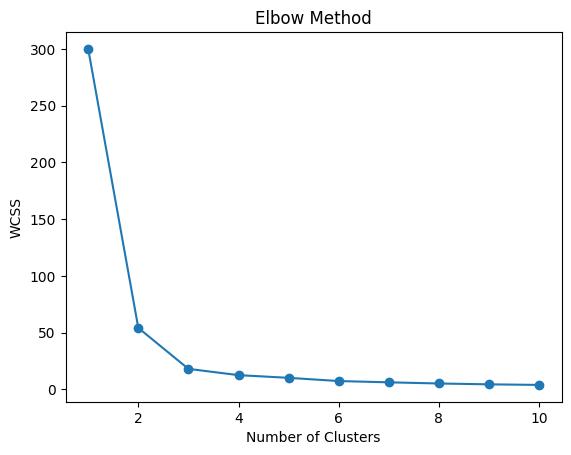

In [70]:
# we elbow method to find the optimal number of clusters
wcss=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmean.fit(x_scaled)
  wcss.append(kmean.inertia_)
plt.plot(range(1,11),wcss,marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [71]:
# we use silhouette score to find the optimal number of clusters
mean=KMeans(n_clusters=3,init="k-means++",random_state=42)
y_kmean=mean.fit_predict(x_scaled)
print(y_kmean)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [72]:
score=silhouette_score(x_scaled,y_kmean)      
print(score)

0.6736179401065728


In [75]:
pd.crosstab(data['Species'], y_kmean)

col_0,0,1,2
Species,,,
Iris-setosa,0,50,0
Iris-versicolor,2,0,48
Iris-virginica,46,0,4


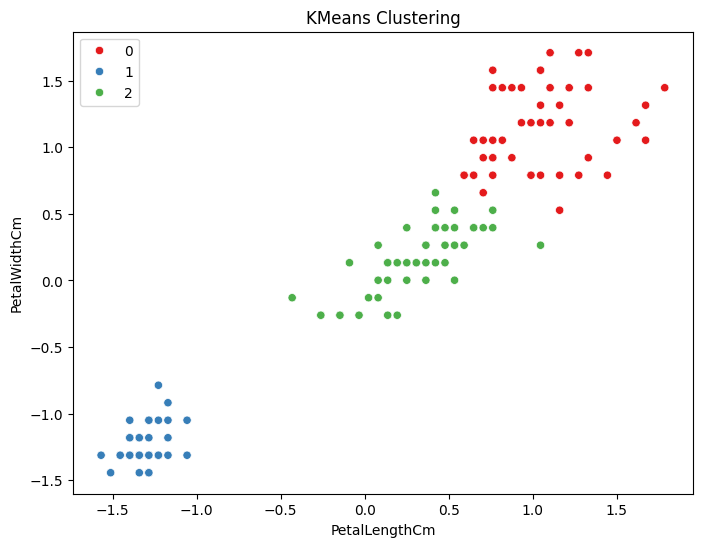

In [78]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=y_kmean,palette="Set1")
plt.title("KMeans Clustering")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")      
plt.show()

In [ ]:
# to see the percentage of data in each cluster
cluster_percent = pd.Series(y_kmean).value_counts(normalize=True) * 100
print(cluster_percent)

2    34.666667
1    33.333333
0    32.000000
Name: proportion, dtype: float64
